In [1]:
import numpy as np

############ 3 Basic Wave Files ################################################

N = 128                   # number of samples
max_val = 4095            # 12-bit DAC

# Sine wave LUT
sine_lut = (np.sin(2 * np.pi * np.arange(N) / N) + 1) * (max_val/2)

# Sawtooth wave LUT
saw_lut = (np.linspace(0, 1, N) * max_val)

# Triangle wave LUT
tri_lut = (2 * np.abs(2 * (np.arange(N) / N - np.floor(0.5 + np.arange(N) / N)))) * max_val

# Round and convert to int
sine_lut = sine_lut.astype(int)
saw_lut = saw_lut.astype(int)
tri_lut = tri_lut.astype(int)

print("Sine LUT:", sine_lut.tolist())
print("Saw LUT:", saw_lut.tolist())
print("Tri LUT:", tri_lut.tolist())


Sine LUT: [2047, 2147, 2248, 2347, 2446, 2545, 2641, 2737, 2831, 2922, 3012, 3100, 3185, 3267, 3346, 3422, 3495, 3564, 3630, 3692, 3749, 3803, 3853, 3898, 3939, 3975, 4006, 4033, 4055, 4072, 4085, 4092, 4095, 4092, 4085, 4072, 4055, 4033, 4006, 3975, 3939, 3898, 3853, 3803, 3749, 3692, 3630, 3564, 3495, 3422, 3346, 3267, 3185, 3100, 3012, 2922, 2831, 2737, 2641, 2545, 2446, 2347, 2248, 2147, 2047, 1947, 1846, 1747, 1648, 1549, 1453, 1357, 1263, 1172, 1082, 994, 909, 827, 748, 672, 599, 530, 464, 402, 345, 291, 241, 196, 155, 119, 88, 61, 39, 22, 9, 2, 0, 2, 9, 22, 39, 61, 88, 119, 155, 196, 241, 291, 345, 402, 464, 530, 599, 672, 748, 827, 909, 994, 1082, 1172, 1263, 1357, 1453, 1549, 1648, 1747, 1846, 1947]
Saw LUT: [0, 32, 64, 96, 128, 161, 193, 225, 257, 290, 322, 354, 386, 419, 451, 483, 515, 548, 580, 612, 644, 677, 709, 741, 773, 806, 838, 870, 902, 935, 967, 999, 1031, 1064, 1096, 1128, 1160, 1193, 1225, 1257, 1289, 1322, 1354, 1386, 1418, 1450, 1483, 1515, 1547, 1579, 1612, 164

In [2]:
import numpy as np
import scipy.io.wavfile as wav

def wav_to_lut(filename, N=128, max_val=4095):
    # Load wav
    fs, data = wav.read(filename)
    
    # If stereo, take one channel
    if len(data.shape) > 1:
        data = data[:,0]
    
    # Normalize to -1..1
    data = data / np.max(np.abs(data))
    
    # Pick N evenly spaced samples
    indices = np.linspace(0, len(data)-1, N, dtype=int)
    samples = data[indices]
    
    # Scale to 0..4095 (12-bit unsigned)
    lut = ((samples + 1) * (max_val/2)).astype(int)
    
    return lut

# Generate LUTs
piano_lut = wav_to_lut("piano.wav")
guitar_lut = wav_to_lut("guitar.wav")
drum_lut = wav_to_lut("drum.wav")

# Print results formatted for C arrays
def print_c_array(name, lut):
    print(f"uint16_t {name}[128] = {{")
    for i in range(0, len(lut), 8):
        print("   " + ", ".join(map(str, lut[i:i+8])) + ",")
    print("};\n")

print_c_array("piano_lut", piano_lut)
print_c_array("guitar_lut", guitar_lut)
print_c_array("drum_lut", drum_lut)


uint16_t piano_lut[128] = {
   2047, 2183, 1984, 2098, 2061, 2088, 2038, 2158,
   2097, 2153, 2084, 2054, 2016, 2333, 2059, 1765,
   2027, 2045, 1970, 2055, 2063, 2051, 1583, 2022,
   2334, 2044, 2884, 1692, 1759, 1843, 2242, 2195,
   1531, 2163, 1969, 2061, 1987, 2088, 1733, 1952,
   1934, 2101, 2252, 1924, 2253, 1929, 2616, 2030,
   2097, 2063, 1985, 2063, 2024, 2037, 2818, 1944,
   2393, 1867, 2000, 1949, 1472, 1911, 1691, 2035,
   1778, 2070, 2143, 2047, 2015, 2021, 1718, 2153,
   1902, 2086, 1794, 2456, 2201, 2032, 2360, 2175,
   2027, 2043, 2004, 2072, 2034, 2041, 2187, 2053,
   2089, 1928, 1843, 2034, 2011, 2226, 2009, 2107,
   2347, 2052, 2077, 2038, 2071, 2023, 1754, 1922,
   1992, 1996, 2162, 2084, 2036, 1999, 1837, 2150,
   2005, 2079, 1997, 2072, 2031, 2060, 1942, 1911,
   1604, 1780, 2077, 2056, 2001, 1938, 2094, 2047,
};

uint16_t guitar_lut[128] = {
   2047, 2362, 2360, 2123, 2097, 1861, 1833, 2015,
   1534, 2092, 2080, 2052, 2087, 2075, 1893, 2036,
   2043, 2027, 1705, 

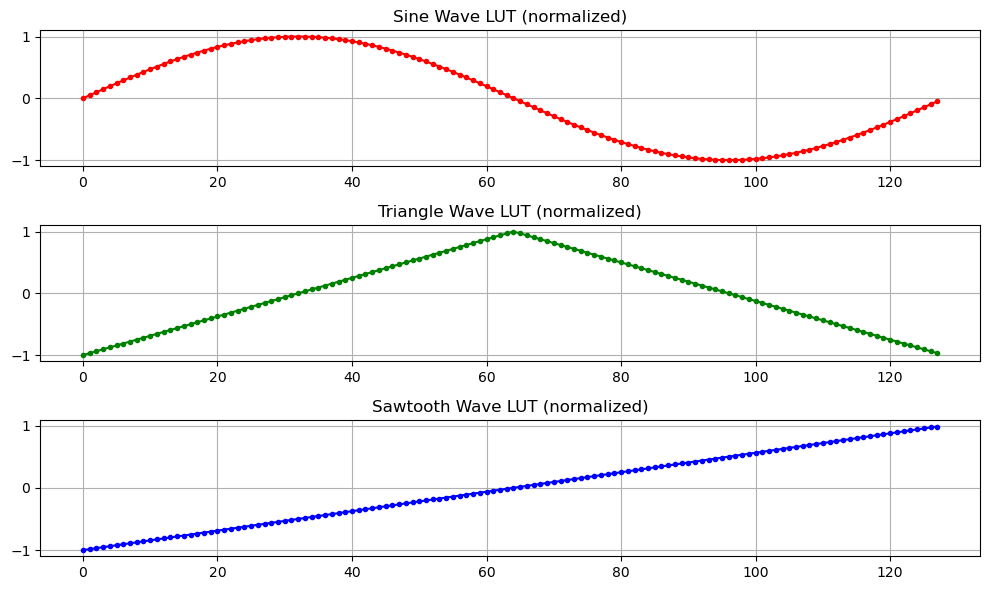

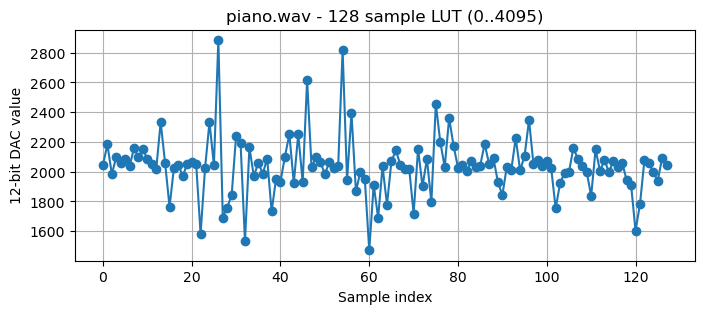

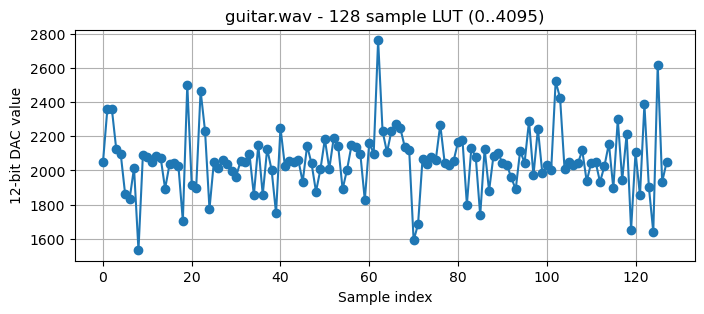

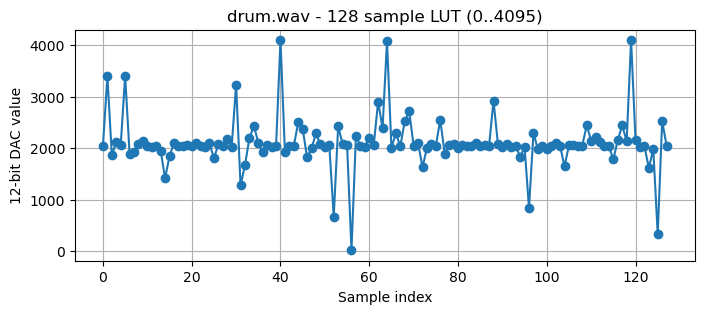

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

def wav_to_lut(filename, N=128, max_val=4095):
    fs, data = wav.read(filename)
    if len(data.shape) > 1:
        data = data[:,0]  # take one channel if stereo
    data = data / np.max(np.abs(data))  # normalize -1..1
    indices = np.linspace(0, len(data)-1, N, dtype=int)
    samples = data[indices]
    lut = ((samples + 1) * (max_val/2)).astype(int)
    return samples, lut

# Example: synthetic signals
N = 128
x = np.arange(N)

sine = np.sin(2*np.pi*x/N)
tri = 2*np.abs(2*(x/N - np.floor(0.5 + x/N))) - 1
saw = 2*(x/N) - 1

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(sine, 'r.-')
plt.title("Sine Wave LUT (normalized)")
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(tri, 'g.-')
plt.title("Triangle Wave LUT (normalized)")
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(saw, 'b.-')
plt.title("Sawtooth Wave LUT (normalized)")
plt.grid(True)

plt.tight_layout()
plt.show()

# Example: plotting real audio LUTs
# Uncomment if you have the files piano.wav, guitar.wav, drum.wav

for fname in ["piano.wav", "guitar.wav", "drum.wav"]:
    samples, lut = wav_to_lut(fname)
    plt.figure(figsize=(8,3))
    plt.plot(lut, 'o-')
    plt.title(f"{fname} - 128 sample LUT (0..4095)")
    plt.xlabel("Sample index")
    plt.ylabel("12-bit DAC value")
    plt.grid(True)
    plt.show()

